In [14]:
from __future__ import print_function
import IPython
import sys
from music21 import *
import numpy as np
from grammar import *
from qa import *
from preprocess import * 
from music_utils import *
from data_utils import *
from music_utils import * 

In [5]:
X, Y, n_values, indices_values = load_music_utils()

In [6]:
X.shape

(60, 30, 78)

In [8]:
Y.shape

(30, 60, 78)

In [9]:
chords, abstract_grammars = get_musical_data('data/original_metheny.mid')

In [10]:
chords

OrderedDict([(0,
              [<music21.instrument.Instrument Piano>,
               <music21.tempo.MetronomeMark Quarter=112.0>,
               <music21.key.Key of G major>,
               <music21.meter.TimeSignature 4/4>]),
             (1,
              [<music21.chord.Chord E-4 G4 C4 B-3 G#2>,
               <music21.chord.Chord B-3 F4 D4 A3>]),
             (2,
              [<music21.chord.Chord E-4 G3 G#3 C4>,
               <music21.chord.Chord F4 B-3 D4 G3>]),
             (3,
              [<music21.chord.Chord E-4 G#3 C4 F3>,
               <music21.chord.Chord F4 D4 B-3 G3>]),
             (4,
              [<music21.chord.Chord G#3 C#4 F3>,
               <music21.chord.Chord E-4 C#4 C4>,
               <music21.chord.Chord B-3 E-3 C4 G3 G#1>]),
             (5,
              [<music21.chord.Chord C4 A3 E4 G3 F2>,
               <music21.chord.Chord E4 C4 A3 G3 F2>,
               <music21.chord.Chord F3 B-3 A3 D4>]),
             (6,
              [<music21.chord.Chord 

In [11]:
abstract_grammars

['C,0.500 C,0.333,<P1,d-5> C,0.250,<M-2,m-6> C,0.250,<M3,d-3> C,0.250,<d6,m2> C,0.250,<d5,P1> C,0.667,<M2,d-4> C,0.250,<d1,P-5> C,0.250,<P-4,d-8> S,0.250,<d4,M-2> S,0.250,<P5,A1> C,0.250,<d5,P1>',
 'C,0.500 S,0.250,<m2,P-4> C,0.250,<P4,m-2> A,0.250,<P4,m-2> S,0.500,<d1,P-5> C,0.250,<P1,d-5> C,0.250,<m2,P-4> A,0.250,<m2,P-4> C,0.250,<M2,d-4> A,0.250,<d4,M-2> C,0.250,<P4,m-2> C,0.250,<P4,m-2>',
 'C,0.250 C,0.250,<d2,A-4> A,0.250,<m-2,d-6> C,0.250,<d3,M-3> A,0.250,<M3,d-3> C,0.250,<d6,m2> C,0.250,<A4,d-2> C,0.250,<d3,M-3> C,0.250,<m2,P-4> A,0.250,<m2,P-4> S,0.250,<P1,d-5> C,0.250,<m2,P-4> C,0.250,<P1,d-5> C,0.250,<m2,P-4> A,0.250,<m2,P-4>',
 'C,0.250 S,0.250,<d6,m2> X,0.250,<A4,d-2> S,0.250,<dd5,d1> C,0.250,<P4,m-2> C,0.250,<M3,d-3> C,0.250,<dd5,d1> S,0.250,<P4,m-2> C,0.250,<P4,m-2> C,0.250,<M3,d-3> C,0.250,<dd5,d1> A,0.250,<M3,d-3>',
 'C,0.500 A,0.333,<M2,d-4> C,0.250,<d4,M-2> A,0.333,<M2,d-4> C,0.250,<m2,P-4> C,0.250,<A-4,P-8> C,0.250,<P4,m-2> A,0.250,<P4,m-2> S,0.250,<d5,P1> A,0.333,<P

In [12]:
data_fn = "data/original_metheny.mid"

In [21]:
from preprocess import __parse_midi,__get_abstract_grammars

In [22]:
measures, chords = __parse_midi(data_fn)

In [28]:
measures[1],chords[1]

([<music21.note.Note E->,
  <music21.note.Note C>,
  <music21.note.Note G>,
  <music21.note.Note G#>,
  <music21.note.Note C>,
  <music21.note.Note E->,
  <music21.note.Note D>,
  <music21.note.Note B->,
  <music21.note.Note D>,
  <music21.note.Note E->,
  <music21.note.Note G>,
  <music21.note.Note B->],
 [<music21.chord.Chord E-4 G4 C4 B-3 G#2>, <music21.chord.Chord B-3 F4 D4 A3>])

In [29]:
measures[2],chords[2]

([<music21.note.Note C>,
  <music21.note.Note B->,
  <music21.note.Note C>,
  <music21.note.Note D>,
  <music21.note.Note B->,
  <music21.note.Note G>,
  <music21.note.Note F>,
  <music21.note.Note E->,
  <music21.note.Note D>,
  <music21.note.Note E->,
  <music21.note.Note F>,
  <music21.note.Note G>],
 [<music21.chord.Chord E-4 G3 G#3 C4>, <music21.chord.Chord F4 B-3 D4 G3>])

In [30]:
abstract_grammars = __get_abstract_grammars(measures, chords)

In [31]:
abstract_grammars

['C,0.500 C,0.333,<P1,d-5> C,0.250,<M-2,m-6> C,0.250,<M3,d-3> C,0.250,<d6,m2> C,0.250,<d5,P1> C,0.667,<M2,d-4> C,0.250,<d1,P-5> C,0.250,<P-4,d-8> S,0.250,<d4,M-2> S,0.250,<P5,A1> C,0.250,<d5,P1>',
 'C,0.500 S,0.250,<m2,P-4> C,0.250,<P4,m-2> A,0.250,<P4,m-2> S,0.500,<d1,P-5> C,0.250,<P1,d-5> C,0.250,<m2,P-4> A,0.250,<m2,P-4> C,0.250,<M2,d-4> A,0.250,<d4,M-2> C,0.250,<P4,m-2> C,0.250,<P4,m-2>',
 'C,0.250 C,0.250,<d2,A-4> A,0.250,<m-2,d-6> C,0.250,<d3,M-3> A,0.250,<M3,d-3> C,0.250,<d6,m2> C,0.250,<A4,d-2> C,0.250,<d3,M-3> C,0.250,<m2,P-4> A,0.250,<m2,P-4> S,0.250,<P1,d-5> C,0.250,<m2,P-4> C,0.250,<P1,d-5> C,0.250,<m2,P-4> A,0.250,<m2,P-4>',
 'C,0.250 S,0.250,<d6,m2> X,0.250,<A4,d-2> S,0.250,<dd5,d1> C,0.250,<P4,m-2> C,0.250,<M3,d-3> C,0.250,<dd5,d1> S,0.250,<P4,m-2> C,0.250,<P4,m-2> C,0.250,<M3,d-3> C,0.250,<dd5,d1> A,0.250,<M3,d-3>',
 'C,0.500 A,0.333,<M2,d-4> C,0.250,<d4,M-2> A,0.333,<M2,d-4> C,0.250,<m2,P-4> C,0.250,<A-4,P-8> C,0.250,<P4,m-2> A,0.250,<P4,m-2> S,0.250,<d5,P1> A,0.333,<P

In [37]:
1430/3

476.6666666666667

In [40]:
for ix in range(1, len(measures)):
    for i in measures[ix]:
        print(i,i.offset)
    print('..................')

<music21.note.Note E-> 476.0
<music21.note.Note C> 1430/3
<music21.note.Note G> 1432/3
<music21.note.Note G#> 477.5
<music21.note.Note C> 1433/3
<music21.note.Note E-> 477.75
<music21.note.Note D> 478.0
<music21.note.Note B-> 478.75
<music21.note.Note D> 1438/3
<music21.note.Note E-> 479.5
<music21.note.Note G> 1439/3
<music21.note.Note B-> 479.75
..................
<music21.note.Note C> 480.0
<music21.note.Note B-> 480.5
<music21.note.Note C> 480.75
<music21.note.Note D> 481.25
<music21.note.Note B-> 1445/3
<music21.note.Note G> 482.5
<music21.note.Note F> 1448/3
<music21.note.Note E-> 482.75
<music21.note.Note D> 483.0
<music21.note.Note E-> 483.25
<music21.note.Note F> 483.5
<music21.note.Note G> 483.75
..................
<music21.note.Note G#> 484.0
<music21.note.Note F> 484.25
<music21.note.Note C#> 484.75
<music21.note.Note C> 485.0
<music21.note.Note C#> 485.25
<music21.note.Note F> 485.5
<music21.note.Note G#> 485.75
<music21.note.Note G> 486.0
<music21.note.Note F> 486.25
<mus

In [41]:
for ix in range(1, len(chords)):
    for j in chords[ix]:
        print(j,j.offset)
    print('..................')

<music21.chord.Chord E-4 G4 C4 B-3 G#2> 476.0
<music21.chord.Chord B-3 F4 D4 A3> 478.0
..................
<music21.chord.Chord E-4 G3 G#3 C4> 480.0
<music21.chord.Chord F4 B-3 D4 G3> 482.0
..................
<music21.chord.Chord E-4 G#3 C4 F3> 484.0
<music21.chord.Chord F4 D4 B-3 G3> 486.0
..................
<music21.chord.Chord G#3 C#4 F3> 488.0
<music21.chord.Chord E-4 C#4 C4> 488.0
<music21.chord.Chord B-3 E-3 C4 G3 G#1> 490.0
..................
<music21.chord.Chord C4 A3 E4 G3 F2> 492.0
<music21.chord.Chord E4 C4 A3 G3 F2> 493.75
<music21.chord.Chord F3 B-3 A3 D4> 494.5
..................
<music21.chord.Chord D2 C4 E3 F3 A3> 496.0
<music21.chord.Chord B-2 F4 C4 D4 A4> 498.5
<music21.chord.Chord B-3 E-3 F4 D4 G3> 499.0
..................
<music21.chord.Chord F3 A3 C4 E4 D2> 500.0
<music21.chord.Chord A3 C4 E4 F3> 501.0
<music21.chord.Chord F3 A3 E4 C4 D2> 501.75
<music21.chord.Chord B-3 F4 D4 A3> 502.5
..................
<music21.chord.Chord B-3 A3 F3 D4> 507.5
..................
<m

In [42]:
m = stream.Voice()
ix = 1
for i in measures[ix]:
    m.insert(i.offset, i)

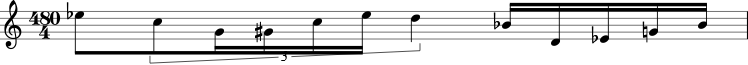

In [43]:
m.show()

In [44]:
c = stream.Voice()
for j in chords[ix]:
    c.insert(j.offset, j)

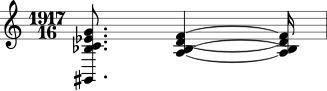

In [45]:
c.show()

In [46]:
fullMeasureNotes = m
fullMeasureChords = c

In [47]:
measure = copy.deepcopy(fullMeasureNotes)

In [48]:
chords = copy.deepcopy(fullMeasureChords)

In [49]:
measure.show('text')

{476.0} <music21.note.Note E->
{476.6667} <music21.note.Note C>
{477.3333} <music21.note.Note G>
{477.5} <music21.note.Note G#>
{477.6667} <music21.note.Note C>
{477.75} <music21.note.Note E->
{478.0} <music21.note.Note D>
{478.75} <music21.note.Note B->
{479.3333} <music21.note.Note D>
{479.5} <music21.note.Note E->
{479.6667} <music21.note.Note G>
{479.75} <music21.note.Note B->


In [50]:
chords.show('text')

{476.0} <music21.chord.Chord E-4 G4 C4 B-3 G#2>
{478.0} <music21.chord.Chord B-3 F4 D4 A3>


In [51]:
measure.removeByNotOfClass([note.Note, note.Rest])

In [52]:
measure.show('text')

{476.0} <music21.note.Note E->
{476.6667} <music21.note.Note C>
{477.3333} <music21.note.Note G>
{477.5} <music21.note.Note G#>
{477.6667} <music21.note.Note C>
{477.75} <music21.note.Note E->
{478.0} <music21.note.Note D>
{478.75} <music21.note.Note B->
{479.3333} <music21.note.Note D>
{479.5} <music21.note.Note E->
{479.6667} <music21.note.Note G>
{479.75} <music21.note.Note B->


In [53]:
chords.removeByNotOfClass([chord.Chord])

In [54]:
chords.show('text')

{476.0} <music21.chord.Chord E-4 G4 C4 B-3 G#2>
{478.0} <music21.chord.Chord B-3 F4 D4 A3>


In [55]:
# Information for the start of the measure.
# 1) measureStartTime: the offset for measure's start, e.g. 476.0.
# 2) measureStartOffset: how long from the measure start to the first element.
measureStartTime = measure[0].offset - (measure[0].offset % 4)

In [56]:
measureStartTime

476.0

In [57]:
measureStartOffset  = measure[0].offset - measureStartTime

In [58]:
measureStartOffset

0.0

In [67]:
from grammar import __is_scale_tone

In [71]:
fullGrammar = ""
prevNote = None # Store previous note. Need for interval.
numNonRests = 0 # Number of non-rest elements. Need for updating prevNote.
for ix, nr in enumerate(measure):    
    # Get the last chord. If no last chord, then (assuming chords is of length
    # >0) shift first chord in chords to the beginning of the measure.
    try: 
        lastChord = [n for n in chords if n.offset <= nr.offset][-1]
        print(ix,nr,lastChord)
    except IndexError:
        print("except")
        chords[0].offset = measureStartTime
        lastChord = [n for n in chords if n.offset <= nr.offset][-1] 

    # FIRST, get type of note, e.g. R for Rest, C for Chord, etc.
    # Dealing with solo notes here. If unexpected chord: still call 'C'.
    elementType = ' '
    # R: First, check if it's a rest. Clearly a rest --> only one possibility.
    if isinstance(nr, note.Rest):
        elementType = 'R'
    # C: Next, check to see if note pitch is in the last chord.
    elif nr.name in lastChord.pitchNames or isinstance(nr, chord.Chord):
        elementType = 'C'
        print("teste1.................",nr.name,nr, chord.Chord)
    # L: (Complement tone) Skip this for now.
    # S: Check if it's a scale tone.
    elif __is_scale_tone(lastChord, nr):
        print("teste2.................",lastChord,nr)
        elementType = 'S'
    # A: Check if it's an approach tone, i.e. +-1 halfstep chord tone.
    elif __is_approach_tone(lastChord, nr):
        elementType = 'A'
    # X: Otherwise, it's an arbitrary tone. Generate random note.
    else:
        elementType = 'X'    
    print(elementType)

0 <music21.note.Note E-> <music21.chord.Chord E-4 G4 C4 B-3 G#2>
teste1................. E- <music21.note.Note E-> <class 'music21.chord.Chord'>
C
1 <music21.note.Note C> <music21.chord.Chord E-4 G4 C4 B-3 G#2>
teste1................. C <music21.note.Note C> <class 'music21.chord.Chord'>
C
2 <music21.note.Note G> <music21.chord.Chord E-4 G4 C4 B-3 G#2>
teste1................. G <music21.note.Note G> <class 'music21.chord.Chord'>
C
3 <music21.note.Note G#> <music21.chord.Chord E-4 G4 C4 B-3 G#2>
teste1................. G# <music21.note.Note G#> <class 'music21.chord.Chord'>
C
4 <music21.note.Note C> <music21.chord.Chord E-4 G4 C4 B-3 G#2>
teste1................. C <music21.note.Note C> <class 'music21.chord.Chord'>
C
5 <music21.note.Note E-> <music21.chord.Chord E-4 G4 C4 B-3 G#2>
teste1................. E- <music21.note.Note E-> <class 'music21.chord.Chord'>
C
6 <music21.note.Note D> <music21.chord.Chord B-3 F4 D4 A3>
teste1................. D <music21.note.Note D> <class 'music21.chor

In [ ]:
def parse_melody(fullMeasureNotes, fullMeasureChords):
    # Remove extraneous elements.x
    measure = copy.deepcopy(fullMeasureNotes)
    chords = copy.deepcopy(fullMeasureChords)
    measure.removeByNotOfClass([note.Note, note.Rest])
    chords.removeByNotOfClass([chord.Chord])

    # Information for the start of the measure.
    # 1) measureStartTime: the offset for measure's start, e.g. 476.0.
    # 2) measureStartOffset: how long from the measure start to the first element.
    measureStartTime = measure[0].offset - (measure[0].offset % 4)
    measureStartOffset  = measure[0].offset - measureStartTime

    # Iterate over the notes and rests in measure, finding the grammar for each
    # note in the measure and adding an abstract grammatical string for it. 

    fullGrammar = ""
    prevNote = None # Store previous note. Need for interval.
    numNonRests = 0 # Number of non-rest elements. Need for updating prevNote.
    for ix, nr in enumerate(measure):
        # Get the last chord. If no last chord, then (assuming chords is of length
        # >0) shift first chord in chords to the beginning of the measure.
        try: 
            lastChord = [n for n in chords if n.offset <= nr.offset][-1]
        except IndexError:
            chords[0].offset = measureStartTime
            lastChord = [n for n in chords if n.offset <= nr.offset][-1]

        # FIRST, get type of note, e.g. R for Rest, C for Chord, etc.
        # Dealing with solo notes here. If unexpected chord: still call 'C'.
        elementType = ' '
        # R: First, check if it's a rest. Clearly a rest --> only one possibility.
        if isinstance(nr, note.Rest):
            elementType = 'R'
        # C: Next, check to see if note pitch is in the last chord.
        elif nr.name in lastChord.pitchNames or isinstance(nr, chord.Chord):
            elementType = 'C'
        # L: (Complement tone) Skip this for now.
        # S: Check if it's a scale tone.
        elif __is_scale_tone(lastChord, nr):
            elementType = 'S'
        # A: Check if it's an approach tone, i.e. +-1 halfstep chord tone.
        elif __is_approach_tone(lastChord, nr):
            elementType = 'A'
        # X: Otherwise, it's an arbitrary tone. Generate random note.
        else:
            elementType = 'X'

        # SECOND, get the length for each element. e.g. 8th note = R8, but
        # to simplify things you'll use the direct num, e.g. R,0.125
        if (ix == (len(measure)-1)):
            # formula for a in "a - b": start of measure (e.g. 476) + 4
            diff = measureStartTime + 4.0 - nr.offset
        else:
            diff = measure[ix + 1].offset - nr.offset

        # Combine into the note info.
        noteInfo = "%s,%.3f" % (elementType, nr.quarterLength) # back to diff

        # THIRD, get the deltas (max range up, max range down) based on where
        # the previous note was, +- minor 3. Skip rests (don't affect deltas).
        intervalInfo = ""
        if isinstance(nr, note.Note):
            numNonRests += 1
            if numNonRests == 1:
                prevNote = nr
            else:
                noteDist = interval.Interval(noteStart=prevNote, noteEnd=nr)
                noteDistUpper = interval.add([noteDist, "m3"])
                noteDistLower = interval.subtract([noteDist, "m3"])
                intervalInfo = ",<%s,%s>" % (noteDistUpper.directedName, 
                    noteDistLower.directedName)
                # print "Upper, lower: %s, %s" % (noteDistUpper,
                #     noteDistLower)
                # print "Upper, lower dnames: %s, %s" % (
                #     noteDistUpper.directedName,
                #     noteDistLower.directedName)
                # print "The interval: %s" % (intervalInfo)
                prevNote = nr

        # Return. Do lazy evaluation for real-time performance.
        grammarTerm = noteInfo + intervalInfo 
        fullGrammar += (grammarTerm + " ")

    return fullGrammar.rstrip()

In [23]:
def __get_abstract_grammars(measures, chords):
    # extract grammars
    abstract_grammars = []
    for ix in range(1, len(measures)):
        m = stream.Voice()
        for i in measures[ix]:
            m.insert(i.offset, i)
        c = stream.Voice()
        for j in chords[ix]:
            c.insert(j.offset, j)
        parsed = parse_melody(m, c)
        abstract_grammars.append(parsed)

    return abstract_grammars